In [14]:
import pandas as pd
import numpy as np
import requests
import datetime
from matplotlib import pyplot
from pandas.plotting import autocorrelation_plot

price_df = pd.read_csv("20180101_hourly_prices.csv")
price_df.head(5)

,Timestamp,106THSO_LNODED1,118THSO_LNODER1,13THSO_LNODE-3,13THSO_LNODED2,23RDST_LNODED3,26FTDROP_GNODEIT,2C559EQ2_7_N001,3RDWEST_LNODED1,3RDWEST_LNODED2,...,YU_GNODEYUGT2,YU_GNODEYUGT3,YU_GNODEYUGT4,YU_GNODEYUGT5,YU_GNODEYUGT6,YU_GNODEYUST1,ZACA_1_N001,ZAMORA_1_N001,ZANKER_1_N001,ZANKER_1_N003
0,2018-01-01 08:00:00,35.93463,35.93463,37.38517,35.93463,35.91220,36.46176,37.16460,35.92715,35.92715,...,36.46924,36.46924,36.46924,36.46924,36.46924,36.46924,38.47308,37.19451,37.64687,37.64687
1,2018-01-01 09:00:00,34.39969,34.39969,35.73252,34.39969,34.37111,34.90710,35.53599,34.39255,34.39255,...,35.00000,35.00000,35.00000,35.00000,35.00000,35.00000,36.71516,35.45023,35.87187,35.87187
2,2018-01-01 10:00:00,32.52304,32.52304,33.74460,32.51967,32.49605,33.01909,33.55900,32.51629,32.51629,...,33.11020,33.11020,33.11020,33.11020,33.11020,33.11020,34.65907,33.48139,33.85595,33.85595
3,2018-01-01 11:00:00,31.32825,31.32825,32.46114,31.32500,31.30553,31.65935,32.30209,31.32176,31.32176,...,31.85412,31.85412,31.85412,31.85412,31.85412,31.85412,33.35058,32.25989,32.59424,32.59424
4,2018-01-01 12:00:00,31.41632,31.41632,32.51534,31.41632,31.40006,31.85528,32.35926,31.41307,31.41307,...,31.84552,31.84552,31.84552,31.84552,31.84552,31.84552,33.39325,32.41779,32.73969,32.73969


In [7]:
price_df.describe()

,106THSO_LNODED1,118THSO_LNODER1,13THSO_LNODE-3,13THSO_LNODED2,23RDST_LNODED3,26FTDROP_GNODEIT,2C559EQ2_7_N001,3RDWEST_LNODED1,3RDWEST_LNODED2,5THWEST_LNODED1,...,YU_GNODEYUGT2,YU_GNODEYUGT3,YU_GNODEYUGT4,YU_GNODEYUGT5,YU_GNODEYUGT6,YU_GNODEYUST1,ZACA_1_N001,ZAMORA_1_N001,ZANKER_1_N001,ZANKER_1_N003
count,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000,...,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000
mean,31.926239,31.926440,35.436599,31.930008,31.935094,32.231567,33.519643,31.927455,31.927455,31.927673,...,31.863755,31.863237,31.863700,31.863802,31.864038,31.863550,35.394270,33.630423,34.572051,34.572051
std,8.331383,8.331753,9.816886,8.333022,8.329837,8.415338,9.683565,8.329954,8.329954,8.330156,...,10.671775,10.671293,10.671854,10.671761,10.671966,10.671532,9.941449,8.700981,9.327254,9.327254
min,9.260640,9.260640,11.004220,9.280090,9.365850,10.266440,7.474230,9.285900,9.285900,9.282290,...,2.313500,2.313500,2.313500,2.313500,2.313500,2.313500,11.451410,11.010870,11.111770,11.111770
25%,26.710957,26.713745,28.892780,26.710957,26.735832,26.930740,27.484700,26.708163,26.708163,26.708163,...,26.291110,26.291110,26.291110,26.291110,26.291110,26.291110,29.141995,28.251158,28.660858,28.660858
50%,31.101320,31.101320,33.655780,31.101320,31.083155,31.186305,32.227465,31.096465,31.096465,31.096465,...,31.423610,31.423610,31.423610,31.423610,31.425230,31.423610,34.042040,32.283775,33.230135,33.230135
75%,36.924067,36.924067,41.138337,36.976757,36.978037,36.959247,38.903742,36.971262,36.971262,36.974690,...,38.182038,38.182038,38.182038,38.182038,38.182038,38.182038,41.102255,38.393410,39.647458,39.647458
max,66.605290,66.613560,82.743560,66.639780,66.746730,69.947550,74.739530,66.632200,66.632200,66.623230,...,74.250250,74.233700,74.250250,74.233700,74.233700,74.233700,78.868430,72.034990,74.566580,74.566580


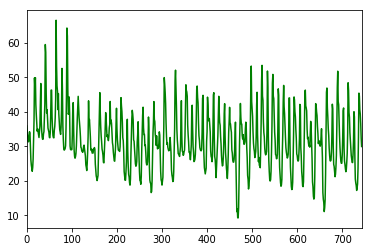

In [20]:
temp=price_df["106THSO_LNODED1"]
#temp.set_index("Timestamp",inplace=True)
#temp.head(5)
temp.plot(color="green")

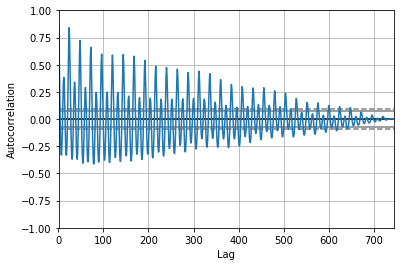

In [21]:
#Autocorrelation plot
from statsmodels.graphics.tsaplots import plot_acf

autocorrelation_plot(temp)
#pyplot.show()

In [23]:
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(temp, order=(25,1,0))
model_fit=model.fit(disp=0)


C:\Users\aksha\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
C:\Users\aksha\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
C:\Users\aksha\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1350: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an arra

NameError: name 'model_fir' is not defined

In [24]:
print(model_fit.summary())
residuals=DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
residuals.plot(kind='kde')
pyplot.show()
print(residuals.describe())

                             ARIMA Model Results                              
Dep. Variable:      D.106THSO_LNODED1   No. Observations:                  743
Model:                ARIMA(25, 1, 0)   Log Likelihood               -1717.241
Method:                       css-mle   S.D. of innovations              2.408
Date:                Sat, 06 Apr 2019   AIC                           3488.482
Time:                        05:13:29   BIC                           3612.970
Sample:                             1   HQIC                          3536.471
                                                                              
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -0.0057      0.020     -0.284      0.777      -0.045       0.034
ar.L1.D.106THSO_LNODED1     -0.1518      0.036     -4.165      0.000      -0.223      -0.

NameError: name 'DataFrame' is not defined

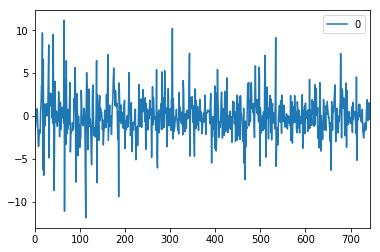

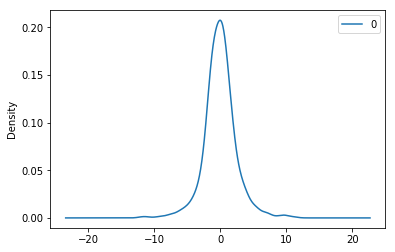

                0
count  743.000000
mean    -0.004005
std      2.453245
min    -11.881394
25%     -1.274421
50%     -0.044515
75%      1.168866
max     11.167860


In [25]:
from pandas import DataFrame

residuals=DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
residuals.plot(kind='kde')
pyplot.show()
print(residuals.describe())